In [29]:
#import modules and data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm
#retrieved from https://www.kaggle.com/ronitf/heart-disease-uci/version/1



! if [ ! -e heart.csv ]; \
then wget https://raw.githubusercontent.com/krbyktl/Biomedical-Data-Science/master/heart.csv; \
fi;

heart = pd.read_csv("heart.csv")
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [30]:
#process data
heart = heart.drop(['age','sex','cp','trestbps','chol','fbs','exang','ca'], axis = 1)
heart.keys()

Index(['restecg', 'thalach', 'oldpeak', 'slope', 'thal', 'target'], dtype='object')

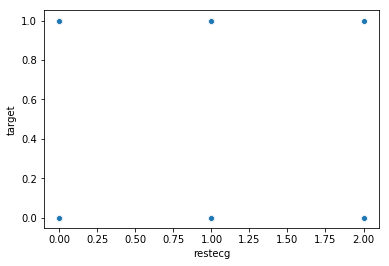

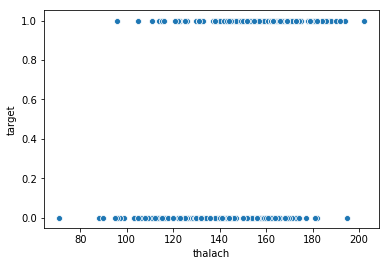

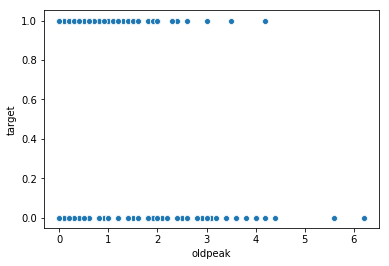

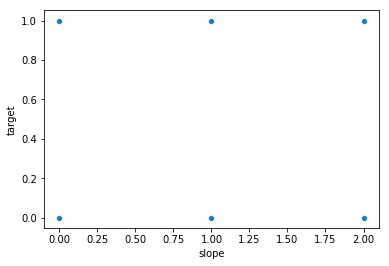

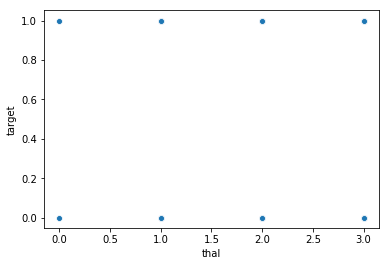

In [31]:
#visualize relationship of independent variables to heart disease
plt.figure()
sns.scatterplot(x = 'restecg',y = 'target', data = heart)
plt.figure()
sns.scatterplot(x = 'thalach',y = 'target', data = heart)
plt.figure()
sns.scatterplot(x = 'oldpeak',y = 'target', data = heart)
plt.figure()
sns.scatterplot(x = 'slope',y = 'target', data = heart)
plt.figure()
sns.scatterplot(x = 'thal',y = 'target', data = heart)

In [32]:
#split data into testing and training fractions
trainFraction = .80
sample = np.random.uniform(size = len(heart)) < trainFraction
trainingDat = heart[sample]
testingDat = heart[~sample]

#preliminary view of data in terms of a linear multiple regression
results = smf.ols('target ~ restecg + thalach + oldpeak + slope + thal', data = heart).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     31.59
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           9.09e-26
Time:                        17:58:33   Log-Likelihood:                -154.11
No. Observations:                 303   AIC:                             320.2
Df Residuals:                     297   BIC:                             342.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0808      0.200      0.405      0.686      -0.312       0.474
restecg        0.0966      0.045      2.162      0.031       0.009       0.185
thalach        0.0063      0.001      5.572      0.000       0.004       0.008
oldpeak       -0.1012      0.025     -3.983      0.000      -0.151      -0.051
slope          0.0503      0.048      1.047      0.296      -0.044       0.145
thal          -0.2111      0.039     -5.399      0.000      -0.288      -0.134
==============================================================================
Omnibus:                       12.490   Durbin-Watson:                   0.687
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.454
Skew:                          -0.328   Prob(JB):                      0.00885
Kurtosis:                       2.436   Cond. No.                     1.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#Perform a logistic regression
x = heart[['restecg','thalach','oldpeak','slope','thal']]
y = heart[['target']]
x = sm.tools.add_constant(x)

xtraining = x[sample]
xtesting = x[~sample]
ytraining = y[sample]
ytesting = y[~sample]

model = sm.discrete.discrete_model.Logit(ytraining, xtraining).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 0.501682
         Iterations 6


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  237
Model:                          Logit   Df Residuals:                      231
Method:                           MLE   Df Model:                            5
Date:                Sun, 06 Oct 2019   Pseudo R-squ.:                  0.2683
Time:                        18:00:32   Log-Likelihood:                -118.90
converged:                       True   LL-Null:                       -162.50
Covariance Type:            nonrobust   LLR p-value:                 2.605e-17
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6865      1.390     -1.213      0.225      -4.411       1.038
restecg        0.2802      0.305      0.918      0.359      -0.318       0.879
thalach        0.0338      0.009      3.945      0.000       0.017       0.051
oldpeak       -0.5231      0.186     -2.807      0.005      -0.888      -0.158
slope          0.2158      0.309      0.698      0.485      -0.390       0.822
thal          -1.3299      0.282     -4.720      0.000      -1.882      -0.778
==============================================================================
"""

[0.48484848484848486, 0.48484848484848486, 0.5, 0.5, 0.5151515151515151, 0.5303030303030303, 0.5757575757575758, 0.6060606060606061, 0.6212121212121212, 0.6515151515151515, 0.6515151515151515, 0.6818181818181818, 0.7121212121212122, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7424242424242424, 0.7424242424242424, 0.7424242424242424, 0.7424242424242424, 0.7424242424242424, 0.7575757575757576, 0.7727272727272727, 0.7878787878787878, 0.7878787878787878, 0.7878787878787878, 0.7878787878787878, 0.7878787878787878, 0.7878787878787878, 0.7878787878787878, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.7878787878787878, 0.7878787878787878, 0.803030303030303, 0.803030303030303, 0.803030303030303, 0.8181818181818182, 0.8181818181818182, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8484848484848485, 0.83333333

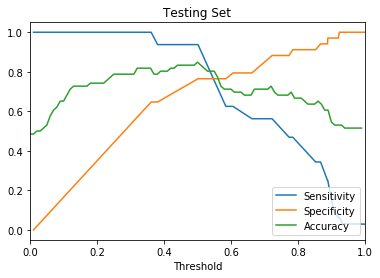

In [47]:
#Derive sensitivity, specificity, and accuracy from the model using the testing set
phatTesting = model.predict(xtesting)

fpr, tpr, threshold = skl.metrics.roc_curve(ytesting, phatTesting)

sensitivity = tpr
specificity = 1 - fpr

thr = np.arange(0,1,0.01)
length = np.arange(0,len(ytesting))
phatTesting = np.asarray(phatTesting)

acc_list = []


for t in thr:
  predictions = []
  for l in length:
    if phatTesting[l] > t:
      predictions.append(1)
    else:
      predictions.append(0)
  values = skl.metrics.accuracy_score(ytesting,predictions)
  acc_list.append(values)

print(acc_list)



plt.figure()
plt.title('Testing Set')
plt.plot(threshold,sensitivity, label = 'Sensitivity')
plt.xlabel('Threshold')
plt.xlim(0,1)

plt.plot(threshold,specificity, label = 'Specificity')

plt.plot(thr,acc_list, label = 'Accuracy')

plt.legend(loc = 'lower right')


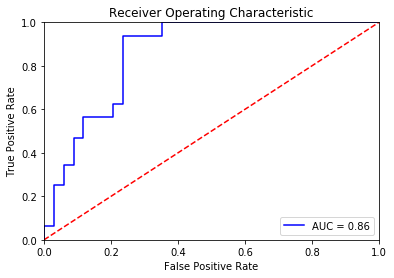

In [35]:
#Compute the AUC of the ROC curve from the testing data
roc_auc = skl.metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[0.5611814345991561, 0.5611814345991561, 0.5654008438818565, 0.5654008438818565, 0.569620253164557, 0.569620253164557, 0.5738396624472574, 0.5949367088607594, 0.6118143459915611, 0.620253164556962, 0.6286919831223629, 0.6413502109704642, 0.6455696202531646, 0.6582278481012658, 0.6624472573839663, 0.6708860759493671, 0.6835443037974683, 0.6877637130801688, 0.6962025316455697, 0.6962025316455697, 0.70042194092827, 0.7130801687763713, 0.7172995780590717, 0.729957805907173, 0.7257383966244726, 0.7257383966244726, 0.7341772151898734, 0.7426160337552743, 0.7426160337552743, 0.7426160337552743, 0.7383966244725738, 0.7510548523206751, 0.7468354430379747, 0.7468354430379747, 0.7426160337552743, 0.7468354430379747, 0.7510548523206751, 0.7510548523206751, 0.7341772151898734, 0.7383966244725738, 0.729957805907173, 0.7257383966244726, 0.7341772151898734, 0.7383966244725738, 0.7383966244725738, 0.7383966244725738, 0.7426160337552743, 0.7426160337552743, 0.7510548523206751, 0.7510548523206751, 0.7510

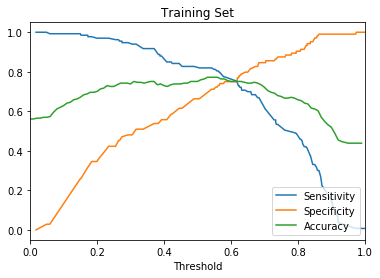

In [46]:
#Cross-validate sensitivity, specificity, and accuracy using the training set
phatTraining = model.predict(xtraining)

fpr, tpr, threshold = skl.metrics.roc_curve(ytraining, phatTraining)

sensitivity1 = tpr
specificity1 = 1 - fpr

thr = np.arange(0,1,0.01)
length = np.arange(0,len(ytraining))
phatTraining = np.asarray(phatTraining)

acc_list1 = []


for t in thr:
  predictions = []
  for l in length:
    if phatTraining[l] > t:
      predictions.append(1)
    else:
      predictions.append(0)
  values = skl.metrics.accuracy_score(ytraining,predictions)
  acc_list1.append(values)

print(acc_list1)



plt.figure()
plt.title('Training Set')
plt.plot(threshold,sensitivity1, label = 'Sensitivity')
plt.xlabel('Threshold')
plt.xlim(0,1)

plt.plot(threshold,specificity1, label = 'Specificity')

plt.plot(thr,acc_list1, label = 'Accuracy')
plt.legend(loc = 'lower right')

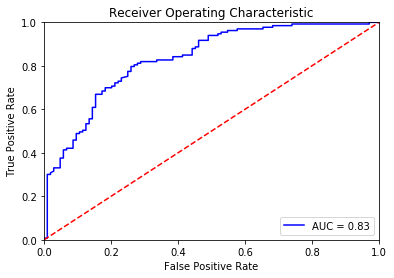

In [37]:
#Comput the AUC of the ROC curve from the training data
roc_auc1 = skl.metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
#Error rate in training vs testing data
roc_diff = roc_auc - roc_auc1
print("The difference in AUC for the two ROC curves derived from training and testing data is %.4f" %(roc_diff))

The difference in AUC for the two ROC curves derived from training and testing data is 0.0254
